# 因果フォレスト（Causal Forests）をPythonで実践的に学ぶ （その２）Pythonでの因果フォレストの準備

url: https://www.salesanalytics.co.jp/datascience/datascience186/

    データサイエンスの領域で、因果関係の推定は非常に重要なトピックとなっています。特に、因果フォレストはその精度と柔軟性で注目を浴びている手法の一つです。

    しかし、この革新的な手法を実際に活用するには、適切な環境のセットアップが欠かせません。

    前回は、因果フォレストの基本概念から理論的背景までを解説し、その魅力と可能性を探りました。

    url: https://www.salesanalytics.co.jp/datascience/datascience185/

    本記事では、Pythonを用いた因果フォレストの準備をステップバイステップで解説します。さあ、因果フォレストの実践的な世界へ一緒に足を踏み入れてみましょう。

## はじめに
    近年、データサイエンスや機械学習の領域で「因果関係の推定」が大きな注目を浴びています。

    この中でも、「因果フォレスト」はその独特なアプローチと高い精度で多くの研究者や実務家から関心を集めています。
    しかし、この先進的な手法を実際に利用するためには、適切なセットアップが欠かせません。

    本記事の主な目的は、Python環境下で因果フォレストモデルを構築する手順と、そのための知識を提供することです。
    ・必要なライブラリーの紹介（r-grfとEconML）
    ・因果フォレストの1つであるCausalForestDMLによる因果推論
    ・DML（Double Machine Learning）による因果フォレストモデルの構築手順
    
    これらのステップを通じて、読者は因果フォレストを用いたデータ解析の第一歩を確実に踏み出すことができるでしょう。この旅の始まりに、あなたを心から歓迎します。

## 因果フォレストのライブラリー
    因果フォレスト（Causal Forest）をPythonで効果的に実行するためには、いくつかのライブラリやツールが必要となります。

    Pythonで因果フォレスト（Causal Forest）を使用して因果推論を行うための主な方法は、以下のライブラリーを使用することです。

    r-grf (Generalized Random Forest)
    grfはRのライブラリーで、因果フォレストが実装されています。鉄板の因果フォレストを実施するならこちらを使います。
    Pythonからrpy2を使用してアクセスできます。要は、RのライブラリーをPythonから呼び出して使う、ということです。

    url: https://github.com/grf-labs/grf/

## EconML
    Microsoft Researchによって開発されたこのライブラリーです。因果推論のための多くの最新の手法を実装しています。
    CausalForestDMLを使うことで、ダブル機械学習のフレームワークを利用した因果フォレスト（Causal Forest）で因果効果を推定することができます。

    url: https://econml.azurewebsites.net/

    Rにアクセスしオリジナルの因果フォレストを使うか、Pythonから直接使えるダブル機械学習による因果フォレスト（Causal Forest）を使うか、どちらがいいでしょうか？

    正直どちらでもいいですが、今回はPythonから簡単に利用でき柔軟性のあるEconMLのCausalForestDMLを使うことで、因果フォレストの因果推論を実施していきます。

    ということで、EconMLライブラリーのインストールです。

    ターミナル（PowerShellやanaconda promptなど）を開き、以下のコマンドを入力します。

In [ ]:
pip install econml

## 因果フォレストの1つである「CausalForestDML」とは？
    因果フォレスト（Causal Forest）にも色々なものがあります。

    例えば、EconMLライブラリーに実装されているCausalForestDMLもその1つです。

    このCausalForestDMLは、通常というか王道の因果フォレスト（Causal Forest）とは少し異なるアプローチをとっています。

    そのアプローチとは、ダブル機械学習のフレームワークを採用している点です。

    ダブル機械学習（Double Machine Learning）とは、2つの機械学習モデルを構築することから来ています。
    ・トリートメントのモデル: トリートメント（T）を特徴量で予測するモデル
    ・アウトカムのモデル: アウトカム（Y）を特徴量で予測するモデル

    このアプローチにより、トリートメントとアウトカムの関係性を別々のモデルで学習することで、通常の因果フォレスト（Causal Forest）と比べて、
    より高度なモデリング技術や正則化の利用、そしてダブル機械学習のフレームワークを組み合わせることで、
    因果効果の推定の精度を向上させることを目指しています。

    フレキシビリティ:トリートメントとアウトカムのモデルとして、任意の機械学習の推定器を使用できます。
    これにより、データの特性や問題の複雑さに合わせて、最適なモデルを選択することができます。

    共変量の取り扱い:通常のCausal Forestは、共変量を直接取り込むことで、トリートメントとアウトカムの関係性をモデル化します。
    一方、CausalForestDMLは、共変量を用いてトリートメントとアウトカムのモデルを別々に学習し、これらのモデルの予測を用いて因果効果を推定します。

    正則化の利用:CausalForestDMLは、正則化を使用することで、モデルの過学習を防ぎます。これは、特に高次元のデータセットにおいて有効です。



## 因果効果の推定精度が向上
    ダブル機械学習（DML）の中核的な考え方の一つが、トリートメント（介入）とアウトカム（結果）の関係性をそれぞれ別々のモデルで学習することによって、
    モデルのバイアス（誤差）を相殺し、因果効果の推定の精度を向上させるという点です。

    因果効果を直接モデリングしようとすると、観測データのみを使用する限り、様々な種類のバイアスが発生する可能性があります。
    特に、共変量（説明変数）がトリートメントとアウトカムの両方に影響を与える場合、共変量が原因で生じる混同を排除することが難しくなります。

    DMLの鍵となる考え方は、トリートメントとアウトカムのモデルのバイアスが、残差を使用した推定の段階で相殺されるということです。
    これは、モデルが共変量の影響を「取り除いて」残差を生成するため、因果効果の推定が共変量の影響から解放されるという考えに基づいています。

    このアプローチにより、トリートメントとアウトカムの関係性を別々のモデルで学習することで、因果効果の推定の精度が向上し、バイアスが低減されると考えられます。

## CausalForestDMLの因果推論アプローチ
### 4種類の変数Y,T,X,Z
    CausalForestDMLは、ダブル機械学習 (Double Machine Learning) の原則に基づいています。
    通常の機械学習のモデルと異なり、Y, T, X, Wの4種類の変数が登場します。

    Y（アウトカム、Outcome）:
    ・アウトカム (Outcome) または従属変数、目的変数とも呼ばれます。
    ・因果関係を知りたい介入の結果としての変数（例: 薬の投与後の患者の回復率、広告キャンペーン後の売上など）。
    ・要は、推定したい因果の「果」です。

    T（トリートメント、Treatment）:
    ・トリートメント (Treatment) または介入、処置変数とも呼ばれます。
    ・2つの状態（介入されたか/されなかったか）または連続的な介入の度合いを示す変数（例: 薬の投与量、広告の予算など）。
    ・要は、推定したい因果の「因」です。

    X（共変量）:
    ・共変量 (Covariates) とも呼ばれる変数群。
    ・トリートメント効果（推定したい因果）の異質性を理解するために使用される変数（例: ユーザーの年齢、地域、性別など）。
    ・これらの変数に基づいて条件付きのトリートメント効果であるCATE（Conditional Average Treatment Effect）を推定します。

    W（制御変数）:
    ・制御変数 (Controls) とも呼ばれる変数群。
    ・アウトカムY とトリートメントT の関係をモデル化する際に、他の潜在的な影響要因を制御するために使用される変数。
    ・トリートメントの割り当てとアウトカムの関係において、混同を引き起こす可能性がある変数を考慮に入れることで、因果関係の推定をより正確にするために使用されます。

    これらの変数を使用して、CausalForestDMLは因果効果を推定し、特にXに基づいてその効果がどのように異なるかを評価します。



## 因果推論アプローチ
    XとWは、ダブル機械学習（Double Machine Learning）フレームワーク、特にCausalForestDMLの文脈において、異なる役割を持つ変数群です。

    CausalForestDMLは、トリートメントモデル（介入の予測モデル）とアウトカムモデル（結果の予測モデル）の構築にXとWを使用します。

    具体的には、CausalForestDMLは以下のように因果推論を行います。

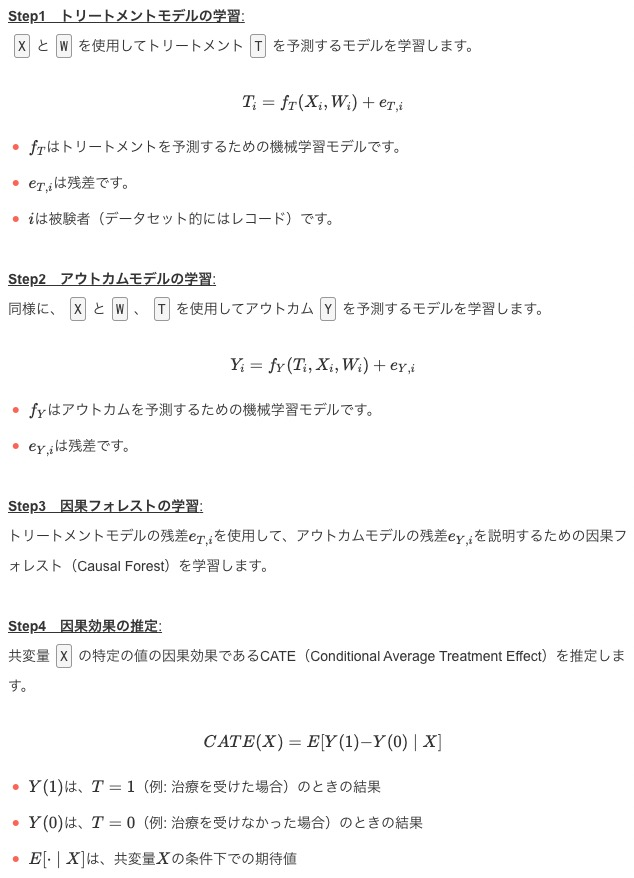

## まとめ
    本記事では、因果フォレストを実行するための主要なライブラリーと、そのインストール方法を紹介しました。
    さらに、因果フォレストの1つであるCausalForestDMLによる因果推論と、その中で使われているダブル機械学習のフレームワークを利用したCATE（Conditional Average Treatment Effect）についてお話ししました。

    以下、CausalForestDMLのポイントです。

    予測モデルの分離: DMLの主要な特性は、トリートメント（介入）とアウトカム（結果）の関係性を別々のモデルで学習することです。
    具体的には、共変量（説明変数）を用いて、トリートメントとアウトカムの予測モデルをそれぞれ独立に構築します。

    モデルの柔軟性: トリートメントとアウトカムのモデルとして、任意の機械学習の推定器を使用できます。これにより、非線形の関係性や複雑な交互作用を捉えることができます。

    残差の利用: 上記のモデルから得られる予測値を、実際のトリートメントとアウトカムから減算して残差を計算します。この残差を用いて、因果効果の推定を行います。
    
    因果効果の推定精度：トリートメントとアウトカムの関係性を別々のモデルで学習することで、因果効果の推定の精度が向上します。

    バイアスの低減: トリートメントとアウトカムのモデルの誤差（バイアス）が、予測モデルを別々に学習することで相殺されるため、因果効果の推定のバイアスが低減します。

    堅牢性: モデルの誤差が因果効果の推定に与える影響を低減させるため、DMLは異なるデータセットや問題設定での堅牢性が高まります。

    高い解釈性: DMLの結果は、因果効果の推定における共変量の役割や影響を明確にすることができるため、解釈性が高いと言えます。
    
    次回の記事3「実践！因果フォレストを用いたデータ分析」では、今回学んだDMLによる因果フォレストモデルの構築＆分析の手順の流れに従って、実際のデータ分析を行ってみます。
    具体的には、データの準備から始め、因果フォレストのモデル構築、そして結果の可視化までの手順を解説します。

    ビジネスの現場での因果フォレストの実用的な利用方法や、データサイエンスのプロジェクトでの適用例についての深い洞察も共有しますので、お楽しみに！